In [91]:
import pandas as pd
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
import xgboost
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import numpy
from sklearn.metrics import accuracy_score

In [77]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt

def plot_roc(y_true, y_score):

    test_auc = roc_auc_score(y_true,y_score)
#     print('AUC Score:'+str(test_auc))

    fpr,tpr,threshold = roc_curve(y_true, y_score) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
    print('ROC AUC:'+str(roc_auc))
    
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [78]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [79]:
def train_test_algorithm(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred_model = model.predict(x_test)
    classifier = str(model).split('(')[0]
    score = metrics.accuracy_score(y_test, y_pred_model)
    preds = model.predict_proba(x_test)
    conmat = confusion_matrix(y_test, y_pred_model)
    print("Accuracy Score: "+str(score))
    plot_roc(y_test, preds[:,1])
    plot_confusion_matrix(conmat,classes=[0, 1],normalize=True,title=classifier+' Confusion Matrix')

In [80]:
df = pd.read_csv('MAP_dataset.csv')
df.sample(5)

,Heart_Rate,T0_MAP,BMI,Height,Age,T0_SBP,SBP,Weight,T0_HR,DBP,...,Sex_1,Allergy,Sex_2,Drinking,Smoking,Cancer,Anemia,Hepatitis,Hypertension,MAP_label
93,-1.429989,1.221468,0.656208,1.747043,1.136253,0.081928,0.391931,1.555928,-1.292699,1.526545,...,1,0,0,1,0,0,0,0,1,0
53,0.901194,-0.938890,-1.027758,-0.078199,0.888855,0.081928,0.082923,-0.856206,1.007589,-0.623774,...,0,0,1,0,0,0,0,0,0,0
86,0.714700,-1.453261,-0.560888,0.202607,-0.018268,-1.721301,-1.647517,-0.353678,0.720053,-1.221084,...,0,0,1,1,0,0,0,0,0,0
38,0.994442,-0.321645,-0.046220,-0.359006,-1.667583,-0.497681,-0.658694,-0.253172,1.007589,0.092999,...,0,0,1,0,0,0,0,0,0,0
37,-0.031279,0.398475,-1.027758,-0.078199,-1.667583,0.275131,0.391931,-0.856206,0.144981,0.451385,...,0,0,1,0,0,0,0,0,0,0


In [81]:
x, y = df.iloc[:,0:-1].values, df.iloc[:,-1].values
print(x.shape,y.shape)

(158, 27) (158,)


In [103]:
svc = svm.SVC(probability=True)  # 支持向量机，SVM
mlp = MLPClassifier(max_iter=1000)  # 多层感知机，MLP
dtc = DecisionTreeClassifier()  # 决策树,DT
knc = KNeighborsClassifier()  # K最近邻,KNN
bnb = BernoulliNB()  # 伯努利贝叶斯，BNB
gnb = GaussianNB()  # 高斯贝叶斯,GNB
# mnb = MultinomialNB()  # 朴素贝叶斯，MNB
lgr = LogisticRegression()  # 逻辑回归，LGR
rfc = RandomForestClassifier()  # 随机森林，RFC
abc = AdaBoostClassifier()  # AdaBoost
xgb = xgboost.XGBClassifier()  # xgboost
tnc = TabNetClassifier()  #Tabnet

Device used : cpu


In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Results of XGBClassifier:
Accuracy Score: 0.7708333333333334
ROC AUC:0.3636363636363636


<Figure size 432x288 with 0 Axes>

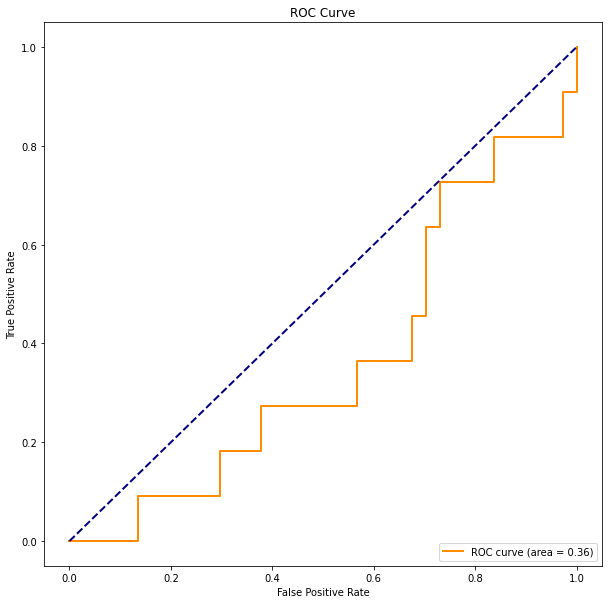

Normalized confusion matrix


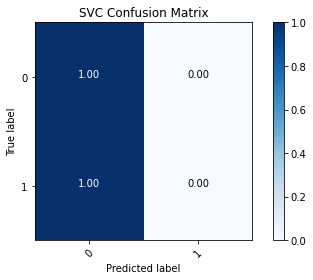



Results of XGBClassifier:
Accuracy Score: 0.7291666666666666
ROC AUC:0.5651105651105651


<Figure size 432x288 with 0 Axes>

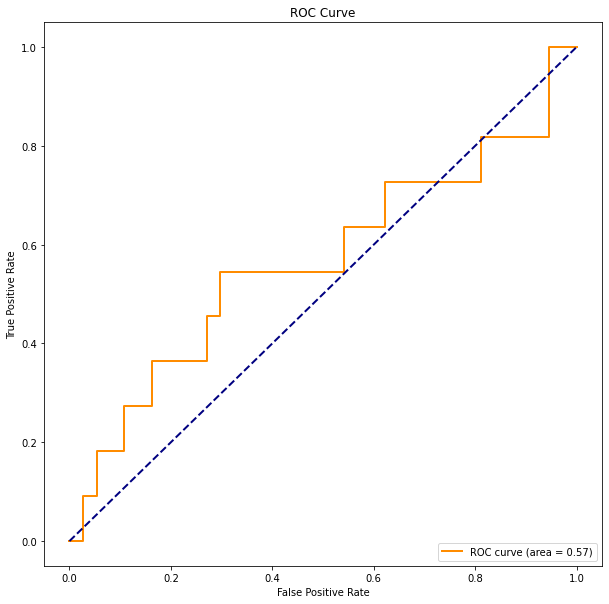

Normalized confusion matrix


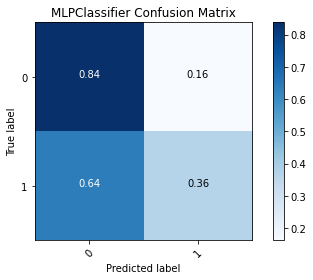



Results of XGBClassifier:
Accuracy Score: 0.5625
ROC AUC:0.4926289926289927


<Figure size 432x288 with 0 Axes>

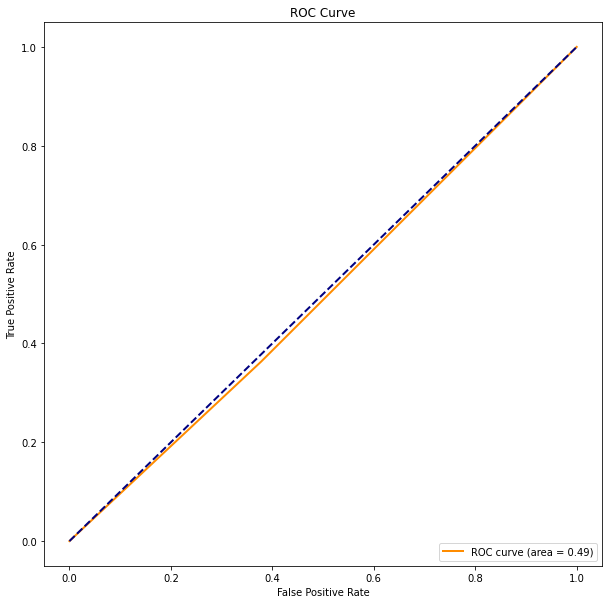

Normalized confusion matrix


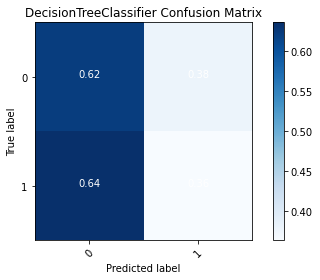



Results of XGBClassifier:
Accuracy Score: 0.7291666666666666
ROC AUC:0.5614250614250614


<Figure size 432x288 with 0 Axes>

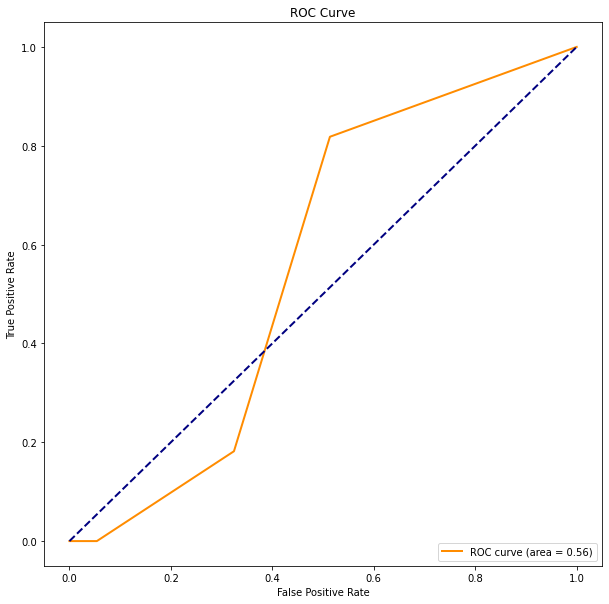

Normalized confusion matrix


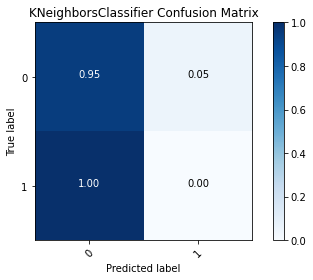



Results of XGBClassifier:
Accuracy Score: 0.6875
ROC AUC:0.64004914004914


<Figure size 432x288 with 0 Axes>

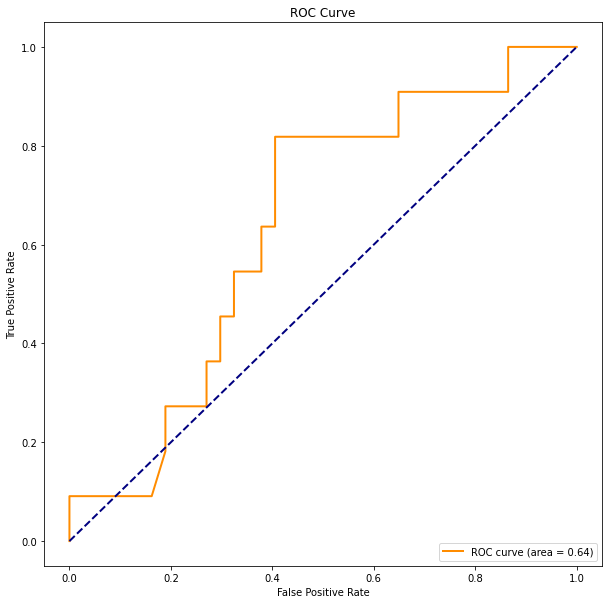

Normalized confusion matrix


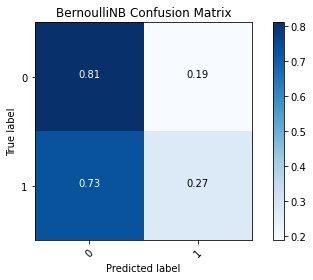



Results of XGBClassifier:
Accuracy Score: 0.3333333333333333
ROC AUC:0.7076167076167076


<Figure size 432x288 with 0 Axes>

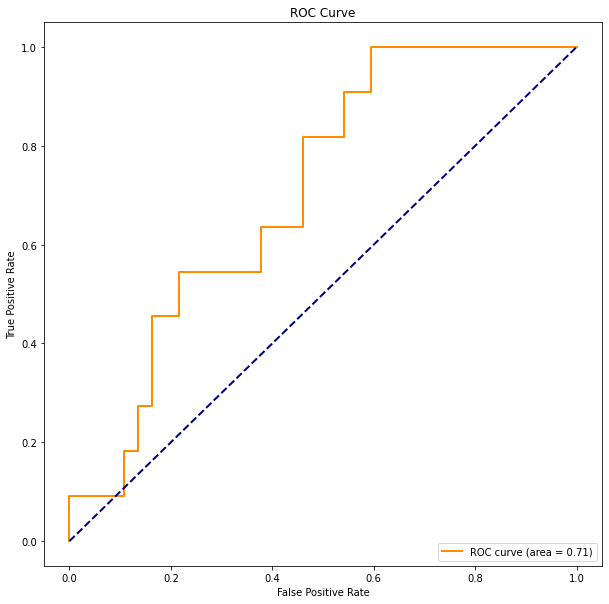

Normalized confusion matrix


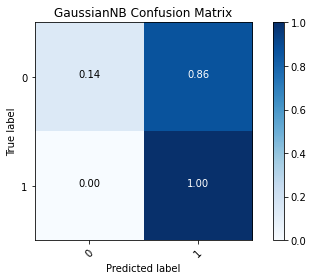



Results of XGBClassifier:
Accuracy Score: 0.6458333333333334
ROC AUC:0.5012285012285012


<Figure size 432x288 with 0 Axes>

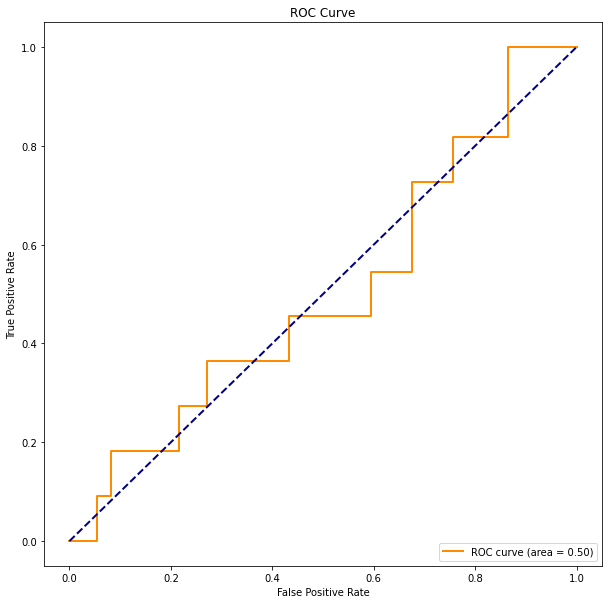

Normalized confusion matrix


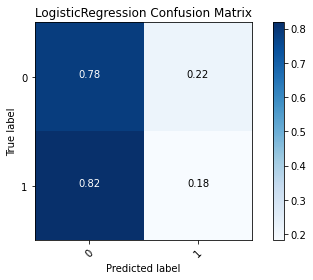



Results of XGBClassifier:
Accuracy Score: 0.7291666666666666
ROC AUC:0.5540540540540541


<Figure size 432x288 with 0 Axes>

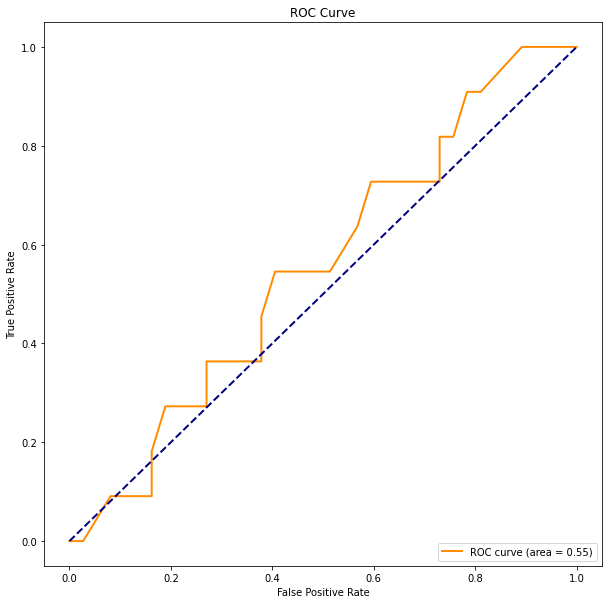

Normalized confusion matrix


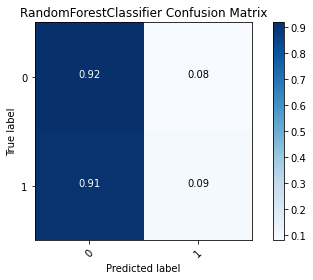



Results of XGBClassifier:
Accuracy Score: 0.6666666666666666
ROC AUC:0.49385749385749383


<Figure size 432x288 with 0 Axes>

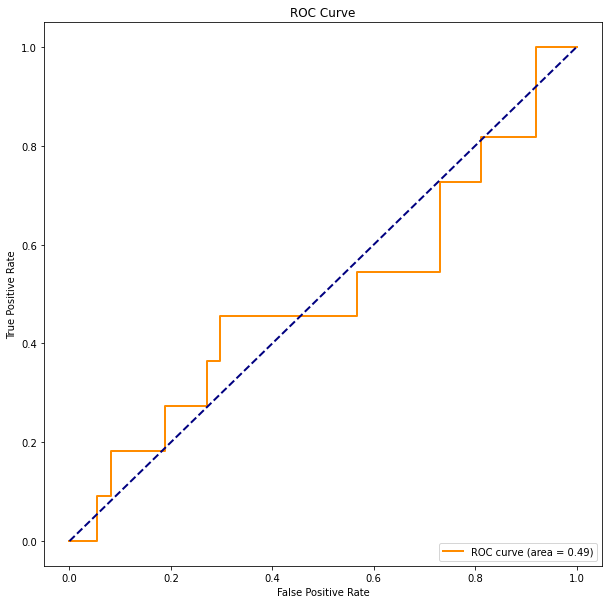

Normalized confusion matrix


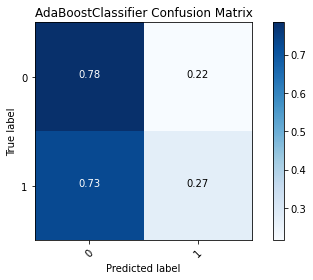



Results of XGBClassifier:
Accuracy Score: 0.7083333333333334
ROC AUC:0.5798525798525798


<Figure size 432x288 with 0 Axes>

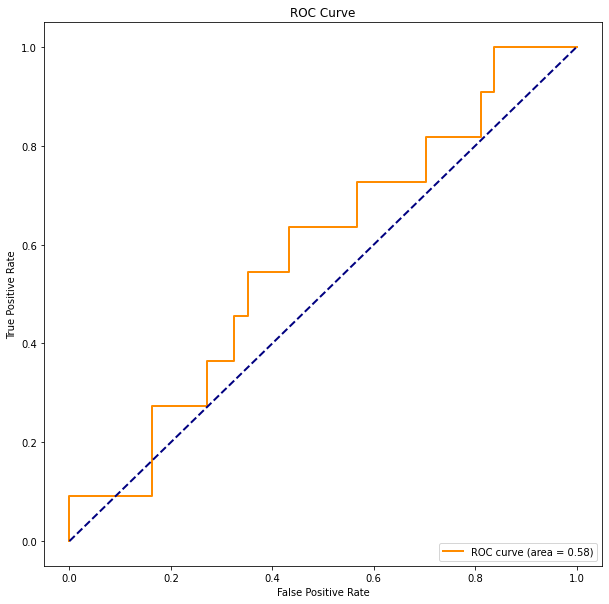

Normalized confusion matrix


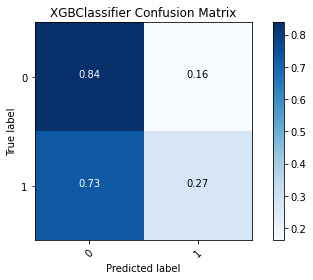

In [107]:
classify_type_list = [svc, mlp, dtc, knc, bnb, gnb, lgr, rfc, abc, xgb]
for model in classify_type_list:
    print('Results of '+classifier+':')
    train_test_algorithm(model, x_train, y_train, x_test, y_test)
    print('\n')

In [87]:
tnc.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_test, y_test)],
    eval_name=['train', 'test'],
    eval_metric=['auc'],
    max_epochs=100,
    patience=30,
    batch_size=8, virtual_batch_size=10,
    num_workers=0,
    weights=1,
    drop_last=False,
)

epoch 0  | loss: 0.83888 | train_auc: 0.46541 | test_auc: 0.29238 |  0:00:00s
epoch 1  | loss: 0.78378 | train_auc: 0.52188 | test_auc: 0.63391 |  0:00:00s
epoch 2  | loss: 0.77883 | train_auc: 0.49271 | test_auc: 0.52826 |  0:00:00s
epoch 3  | loss: 0.74646 | train_auc: 0.61741 | test_auc: 0.42506 |  0:00:00s
epoch 4  | loss: 0.77326 | train_auc: 0.63012 | test_auc: 0.38329 |  0:00:00s
epoch 5  | loss: 0.65031 | train_auc: 0.61506 | test_auc: 0.48157 |  0:00:00s
epoch 6  | loss: 0.73282 | train_auc: 0.59106 | test_auc: 0.51597 |  0:00:01s
epoch 7  | loss: 0.74066 | train_auc: 0.55059 | test_auc: 0.42998 |  0:00:01s
epoch 8  | loss: 0.68197 | train_auc: 0.69365 | test_auc: 0.55528 |  0:00:01s
epoch 9  | loss: 0.67101 | train_auc: 0.69741 | test_auc: 0.68059 |  0:00:01s
epoch 10 | loss: 0.66742 | train_auc: 0.65318 | test_auc: 0.54545 |  0:00:01s
epoch 11 | loss: 0.65622 | train_auc: 0.65459 | test_auc: 0.55774 |  0:00:01s
epoch 12 | loss: 0.67011 | train_auc: 0.69647 | test_auc: 0.3734

ROC AUC:0.855036855036855


<Figure size 432x288 with 0 Axes>

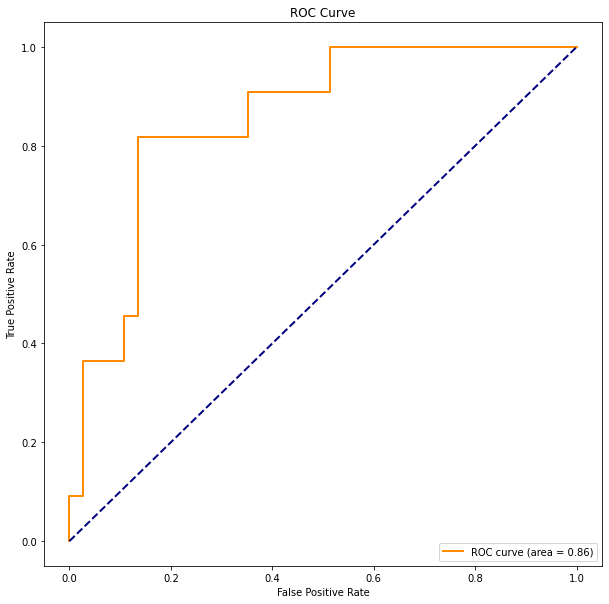

In [92]:
preds = tnc.predict_proba(x_test)
plot_roc(y_test, preds[:,1])

In [93]:
y_pred = tnc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('model accuracy:'+str(accuracy))

model accuracy:0.75


Normalized confusion matrix


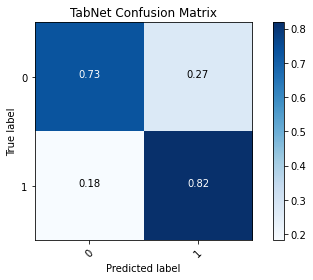

In [96]:
conmat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conmat, classes=[0, 1], normalize=True, title='TabNet Confusion Matrix')